In [1]:
# Imports of libraries and frameworks:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

# Plot style:

#plt.style.use('/media/navar/Dados/Navar/PYTHON_Functions/latex_jupyter_navar.mplstyle')

Load dataset:

In [2]:


filename = '../../datasets/v000_SCIG_SC_SENSORC_FOURIER_010.csv'
dataset = pd.read_csv(filename);

FileNotFoundError: File b'v000_SCIG_SC_SENSORC_FOURIER_010.csv' does not exist

In [3]:
dataset.head()

,idx,fx1_R,fx0d5_R,fx1d5_R,fx2d5_R,fx3_R,fx5_R,fx7_R,fx1_S,fx0d5_S,...,fx5_T,fx7_T,Freq_Rated,Freq_Gen,CC_bus,Power,I_R_rms,I_S_rms,I_T_rms,Class
0,1,2.619752,0.007299,0.006626,0.000968,0.023378,0.023553,0.006339,2.648703,0.007219,...,0.022515,0.006059,45.0,43.85,369,0.57,2.906343,2.920356,2.986445,1
1,2,3.501446,0.003416,0.006184,0.001155,0.023907,0.013409,0.005977,3.551664,0.003368,...,0.012837,0.005722,45.0,43.87,368,0.55,2.885150,2.896358,2.962763,1
2,3,3.935047,0.003490,0.004380,0.000786,0.018111,0.011143,0.005009,3.941393,0.003484,...,0.010877,0.004889,45.0,43.89,367,0.55,2.851384,2.863890,2.935414,1
3,4,3.891862,0.002984,0.002304,0.000533,0.019345,0.014027,0.004023,3.898499,0.002979,...,0.013642,0.003913,45.0,43.91,365,0.53,2.819084,2.827510,2.900116,1
4,5,3.209589,0.004993,0.004015,0.001150,0.025392,0.018566,0.004693,3.233597,0.004956,...,0.018027,0.004557,45.0,43.93,363,0.52,2.761420,2.774290,2.844834,1


Remove unwanted features

In [4]:
unwanteFeatures = ['idx', 'fx1_R', 'fx1_S', 'fx1_T', 'Freq_Rated', 'Power']
dataset_important_features = dataset.drop(unwanteFeatures, axis=1)

dataset_important_features.head()

,fx0d5_R,fx1d5_R,fx2d5_R,fx3_R,fx5_R,fx7_R,fx0d5_S,fx1d5_S,fx2d5_S,fx3_S,...,fx2d5_T,fx3_T,fx5_T,fx7_T,Freq_Gen,CC_bus,I_R_rms,I_S_rms,I_T_rms,Class
0,0.007299,0.006626,0.000968,0.023378,0.023553,0.006339,0.007219,0.006553,0.000958,0.023122,...,0.000926,0.022347,0.022515,0.006059,43.85,369,2.906343,2.920356,2.986445,1
1,0.003416,0.006184,0.001155,0.023907,0.013409,0.005977,0.003368,0.006097,0.001139,0.023569,...,0.001106,0.022888,0.012837,0.005722,43.87,368,2.885150,2.896358,2.962763,1
2,0.003490,0.004380,0.000786,0.018111,0.011143,0.005009,0.003484,0.004373,0.000785,0.018082,...,0.000767,0.017678,0.010877,0.004889,43.89,367,2.851384,2.863890,2.935414,1
3,0.002984,0.002304,0.000533,0.019345,0.014027,0.004023,0.002979,0.002300,0.000532,0.019312,...,0.000518,0.018814,0.013642,0.003913,43.91,365,2.819084,2.827510,2.900116,1
4,0.004993,0.004015,0.001150,0.025392,0.018566,0.004693,0.004956,0.003986,0.001141,0.025204,...,0.001116,0.024655,0.018027,0.004557,43.93,363,2.761420,2.774290,2.844834,1


In [5]:
# X are the inputs and y the outputs:

X = dataset_important_features.values[:,:-1]
y = dataset_important_features.values[:,-1]

### Preprocessing data with standardization

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipline = p

std_scaler = StandardScaler();
std_scaler.fit(X)

X_prepared = std_scaler.transform(X)

## Training with 10-fold Cross Validation

In [7]:
# Create an MLP:
from sklearn.neural_network import MLPClassifier

mlpCLf = MLPClassifier(solver='lbfgs', alpha=1e-5, learning_rate='adaptive', learning_rate_init = 0.1,
                    max_iter=1300, momentum=0.3, activation = 'tanh', power_t=0.5,
                    hidden_layer_sizes=(10,))

In [63]:
# Create a cross validation object:

from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(mlpCLf, X_prepared, y, cv=10)

In [64]:
def percentage_confusion_matrix (mat):
    return np.around(100*(mat / mat.sum(axis=1)[:,None]), 2)

In [65]:
print(percentage_confusion_matrix(metrics.confusion_matrix(y_pred, y)))
print(metrics.accuracy_score(y_pred, y))

[[99.19  0.    0.    0.4   0.4   0.    0.  ]
 [ 0.48 85.65  0.    0.   13.4   0.48  0.  ]
 [ 0.54  1.08 90.81  3.24  3.24  1.08  0.  ]
 [ 0.    0.    3.85 96.15  0.    0.    0.  ]
 [ 0.   13.25  0.6   0.   85.54  0.6   0.  ]
 [ 0.    0.    1.44  0.48  0.   96.17  1.91]
 [ 0.    0.    0.    0.    0.    1.91 98.09]]
0.9328908554572272


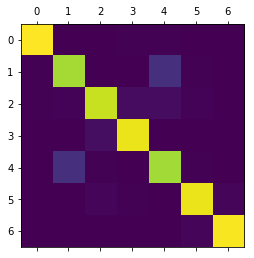

In [70]:
mat = metrics.confusion_matrix(y_pred, y)

plt.matshow((mat / mat.sum(axis=1)[:,None]))
plt.show()